## ETL Pipeline

In [1]:
import requests
import pandas as pd
from sqlalchemy import create_engine

In [2]:
def extract() -> dict:

  API_URL = "http://universities.hipolabs.com/search?country=United+States"
  data = requests.get(API_URL).json()
  return data

In [3]:
data = extract()
print(data[0])

{'name': 'Marywood University', 'alpha_two_code': 'US', 'country': 'United States', 'web_pages': ['http://www.marywood.edu'], 'state-province': None, 'domains': ['marywood.edu']}


In [4]:
def transform(data: dict) -> pd.DataFrame:
  df = pd.DataFrame(data)
  print("Total number of universities", len(df))
  df = df[df["name"].str.contains("Oklahoma")]
  print("Total number of universities in Oklahoma", len(df))
  df["domains"] = [",".join(map(str,l)) for l in df["domains"]]
  df["web_pages"] = [",".join(map(str,l)) for l in df["web_pages"]]
  df = df.reset_index(drop=True)
  return df[["domains", "country", "web_pages", "name"]]

In [5]:
def load(df: pd.DataFrame) -> None:
  disk_engine = create_engine("sqlite:///universities.db")
  df.to_sql("ok_uni", disk_engine, if_exists="replace")
  df.to_csv("test.csv")

In [6]:
transformed_data = transform(data=data)

Total number of universities 2307
Total number of universities in Oklahoma 12


In [7]:
transformed_data.head()

,domains,country,web_pages,name
0,uco.edu,United States,http://www.uco.edu/,University of Central Oklahoma
1,oc.edu,United States,http://www.oc.edu/,Oklahoma Christian University
2,okbu.edu,United States,http://www.okbu.edu/,Oklahoma Baptist University
3,okcu.edu,United States,http://www.okcu.edu/,Oklahoma City University
4,okstate.edu,United States,http://www.okstate.edu/,Oklahoma State University


In [8]:
load(transformed_data)

## Visualization

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
N_points = 100000
n_bins = 20

In [11]:
rng = np.random.default_rng(N_points)

In [12]:
dist1 = rng.standard_normal(N_points)
dist2 = 0.4 * rng.standard_normal(N_points)

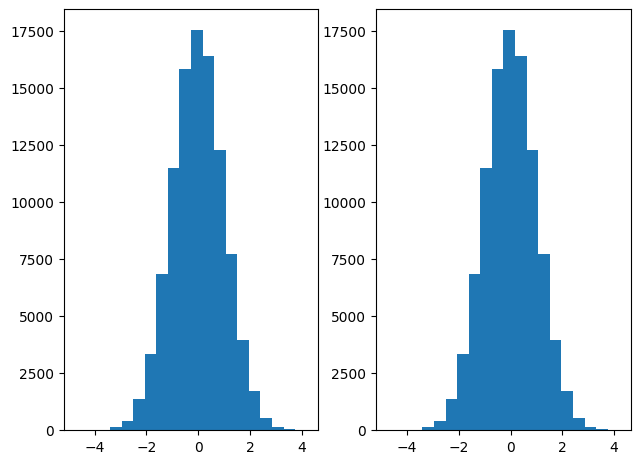

In [13]:
import matplotlib.pyplot as plt

axs = []
for i in range(2):
    ax = plt.subplot(121 + int(i))  # Adjusting subplot index
    axs.append(ax)
plt.tight_layout()
axs[0].hist(dist1, bins=n_bins)
axs[1].hist(dist1, bins=n_bins)
plt.show()

## Feature Engineering

In [ ]:
!pip install autofeat

In [16]:
from autofeat import AutoFeatClassifier
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_wine
data = load_wine()
X,y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =0)
model = AutoFeatClassifier()
df = model.fit_transform(X, y)
y_pred = model.predict(X_test)
print("Final Accuracy: %.4f" % model.score(df, y))

/home/akarx/MLOps/mlops_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:


Final Accuracy: 1.0000


In [17]:
from autofeat import FeatureSelector
fsel = FeatureSelector(verbose=1)
new_X = fsel.fit_transform(pd.DataFrame(X), pd.DataFrame(y))

[featsel] Scaling data...

/home/akarx/MLOps/mlops_venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
2024-06-25 08:03:36,714 INFO: [featsel] Feature selection run 1/5
2024-06-25 08:03:36,751 INFO: [featsel] Feature selection run 2/5
2024-06-25 08:03:36,791 INFO: [featsel] Feature selection run 3/5
2024-06-25 08:03:36,828 INFO: [featsel] Feature selection run 4/5
2024-06-25 08:03:36,862 INFO: [featsel] Feature selection run 5/5
2024-06-25 08:03:36,905 INFO: [featsel] 9 features after 5 feature selection runs
/home/akarx/MLOps/mlops_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
202

done.


2024-06-25 08:03:36,917 INFO: [featsel] 9 features after noise filtering


In [18]:
new_X.head()

,0,3,6,9,10,11,12,1,2
0,14.23,15.6,3.06,5.64,1.04,3.92,1065.0,1.71,2.43
1,13.20,11.2,2.76,4.38,1.05,3.40,1050.0,1.78,2.14
2,13.16,18.6,3.24,5.68,1.03,3.17,1185.0,2.36,2.67
3,14.37,16.8,3.49,7.80,0.86,3.45,1480.0,1.95,2.50
4,13.24,21.0,2.69,4.32,1.04,2.93,735.0,2.59,2.87


## Data Versioning

In [ ]:
!pip install dvc

In [24]:
!dvc add test.csv

ERROR: you are not inside of a DVC repository (checked up to mount point '/')


In [21]:
!mkdir data


In [27]:
%cd /home/akarx/MLOps_NLP/data

/home/akarx/MLOps_NLP/data


/home/akarx/MLOps/mlops_venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [28]:
!dvc init --no-scm

Initialized DVC repository.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


In [30]:
!mv /home/akarx/MLOps_NLP/test.csv /home/akarx/MLOps_NLP/data

In [32]:
!dvc add test.csv

⠋ Checking graph                                       core>
Adding...                                                                       
!
                                                                                
!
  0% Checking cache in '/home/akarx/MLOps_NLP/data/.dvc/cache/files/md5'| |0/? [
                                                                                
!
  0%|          |Adding test.csv to cache              0/1 [00:00<?,     ?file/s]
                                                                                
!
  0%|          |Checking out /home/akarx/MLOps_NLP/dat0/1 [00:00<?,    ?files/s]
100% Adding...|████████████████████████████████████████|1/1 [00:00, 57.25file/s]


In [34]:
%cd ..

/home/akarx/MLOps_NLP


/home/akarx/MLOps/mlops_venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Model Building

In [35]:
!pip install pickle5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 KB 274.8 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for pickle5, since package 'wheel' is not installed.
  Running setup.py install for pickle5 ... done


In [36]:
import os
import pickle5 as pickle
import sys

import numpy as np
import yaml
from sklearn.ensemble import RandomForestClassifier

In [37]:
seed = 42
n_est = 100
min_split = 2
n_jobs = 2

In [38]:
# params = yaml.safe_load(open("param.yaml"))

In [39]:
clf = RandomForestClassifier(
    n_estimators = n_est,
    min_samples_split = min_split,
    n_jobs = n_jobs,
    random_state=seed
)

In [40]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=42)

In [42]:
filename = "/home/akarx/MLOps_NLP/data/my_model.pkl"
with open(filename, "wb") as fd:
    pickle.dump(clf, fd)

## Experiment Tracking

In [43]:
!pip install mlflow

In [44]:
import mlflow

In [45]:
mlflow.autolog()

rf = RandomForestClassifier(
    n_estimators = n_est,
    max_depth = 6,
    max_features = 3,
    random_state=seed
)

rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

2024/06/25 08:09:51 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2024/06/25 08:09:51 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/06/25 08:09:51 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '12381a6dd503427aad4b755d377a6db0', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


In [46]:
!mlflow server -h 0.0.0.0 -p 8080 --backend-store-uri /home/akarx/MLOps_NLP/mlruns

[2024-06-25 08:10:16 +0000] [1539797] [INFO] Starting gunicorn 22.0.0
[2024-06-25 08:10:16 +0000] [1539797] [INFO] Listening at: http://0.0.0.0:8080 (1539797)
[2024-06-25 08:10:16 +0000] [1539797] [INFO] Using worker: sync
[2024-06-25 08:10:16 +0000] [1539799] [INFO] Booting worker with pid: 1539799
[2024-06-25 08:10:17 +0000] [1539800] [INFO] Booting worker with pid: 1539800
[2024-06-25 08:10:17 +0000] [1539801] [INFO] Booting worker with pid: 1539801
[2024-06-25 08:10:17 +0000] [1539802] [INFO] Booting worker with pid: 1539802
^C
[2024-06-25 08:11:09 +0000] [1539797] [INFO] Handling signal: int
[2024-06-25 08:11:09 +0000] [1539799] [INFO] Worker exiting (pid: 1539799)
[2024-06-25 08:11:09 +0000] [1539802] [INFO] Worker exiting (pid: 1539802)
[2024-06-25 08:11:09 +0000] [1539800] [INFO] Worker exiting (pid: 1539800)
[2024-06-25 08:11:09 +0000] [1539801] [INFO] Worker exiting (pid: 1539801)


## Model and Data Drift

In [47]:
import numpy as np
from sklearn import datasets, ensemble

In [48]:
!pip install evidently

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 1.2 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.1/530.1 KB 2.3 MB/s eta 0:00:00a 0:00:01
  Using cached plotly-5.22.0-py3-none-any.whl (16.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.8/230.8 KB 931.6 kB/s eta 0:00:00a 0:00:01
  Using cached typing_inspect-0.9.0-py3-none-any.whl (8.8 kB)
  Using cached watchdog-4.0.1-py3-none-manylinux2014_x86_64.whl (83 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 5.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 KB 207.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.3/210.3 KB 870.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 KB 981.2 kB/s eta 0:00:00a 0:00:01
  Using cached mypy_extensions-1.0.0-py3-none-any.whl (4.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.4 MB/s eta 0:00:00:00:01


In [49]:
from evidently.report import report

In [50]:
from evidently.metric_preset import (
  DataDriftPreset,
  DataQualityPreset,
  RegressionPreset,
  ClassificationPreset,
  TargetDriftPreset
)